#  Lab 7: Visualizing Tree Data

# 1. Node-Link Diagram

**Dataset:** Simulated company organizational chart with employee counts  
**Description:**  
- Hierarchy: Company → Departments → Teams  
- Each node label is a department/team name; node color encodes employee count.  
- 9 nodes, 8 edges.

**Features used:**  
- Node label (department/team name)  
- Node color (employee count)

**Observation:**  
- The Engineering department is the largest, with the Backend team having the most employees.

In [1]:
!pip install squarify matplotlib networkx


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import squarify
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

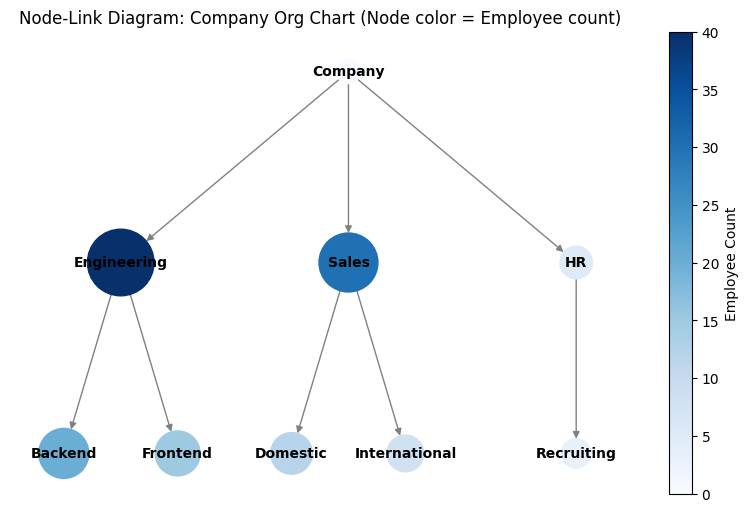

In [7]:


# Simulated org chart: (node, parent, employee_count)
nodes = [
    ("Company", None, 0),
    ("Engineering", "Company", 40),
    ("Backend", "Engineering", 20),
    ("Frontend", "Engineering", 15),
    ("Sales", "Company", 30),
    ("Domestic", "Sales", 12),
    ("International", "Sales", 8),
    ("HR", "Company", 5),
    ("Recruiting", "HR", 3),
]

G = nx.DiGraph()
for name, parent, count in nodes:
    G.add_node(name, size=count)
    if parent:
        G.add_edge(parent, name)

def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.successors(root))
    if parent is not None and parent in children:
        children.remove(parent)
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc-vert_gap, xcenter=nextx,
                                pos=pos, parent=root)
    return pos

pos = hierarchy_pos(G, "Company")
sizes = [G.nodes[n]['size']*50+300 for n in G.nodes]  # scale for visibility
colors = [G.nodes[n]['size'] for n in G.nodes]

fig, ax = plt.subplots(figsize=(10, 6))
nodes_drawn = nx.draw(
    G, pos,
    with_labels=True,
    node_size=sizes,
    node_color=colors,
    cmap=plt.cm.Blues,
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    ax=ax
)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Employee Count")
plt.title("Node-Link Diagram: Company Org Chart (Node color = Employee count)")
plt.axis("off")
plt.show()

# 2. Indented Tree (AST Visualization)

**Expression:** `(1 + 2) - 3 * (7 / 4 + (5 - 7))`  
**Description:**  
- The tree below shows the post-order traversal of the expression as an Abstract Syntax Tree (AST).

**Features used:**  
- Node label (operator or operand)  
- Indentation/branching for hierarchy

**Observation:**  
- The tree structure makes operator precedence and grouping explicit, showing how multiplication and division are nested within addition and subtraction.

In [8]:
# AST Node class
class ASTNode:
    def __init__(self, value, children=None):
        self.value = value
        self.children = children or []

def print_ast(node, prefix="", is_last=True):
    connector = "└── " if is_last else "├── "
    print(prefix + connector + str(node.value))
    prefix += "    " if is_last else "│   "
    for i, child in enumerate(node.children):
        print_ast(child, prefix, i == len(node.children) - 1)

# Build AST for (1 + 2) - 3 * (7 / 4 + (5 - 7))
ast = ASTNode("-", [
    ASTNode("+", [
        ASTNode("1"),
        ASTNode("2")
    ]),
    ASTNode("*", [
        ASTNode("3"),
        ASTNode("+", [
            ASTNode("/", [
                ASTNode("7"),
                ASTNode("4")
            ]),
            ASTNode("-", [
                ASTNode("5"),
                ASTNode("7")
            ])
        ])
    ])
])

# Print the indented AST
print("-")
for i, child in enumerate(ast.children):
    print_ast(child, "", i == len(ast.children) - 1)


-
├── +
│   ├── 1
│   └── 2
└── *
    ├── 3
    └── +
        ├── /
        │   ├── 7
        │   └── 4
        └── -
            ├── 5
            └── 7


# 3. Treemap

**Dataset:** Simulated company org chart (same as above)  
**Description:**  
- Each rectangle represents a department or team, sized by employee count.  
- Parent rectangles contain their child teams.

**Features used:**  
- Rectangle size (employee count)  
- Rectangle color (department/team)  
- Hover label (name and count)

**Observation:**  
- The Engineering department occupies the largest area, with Backend as the largest team.

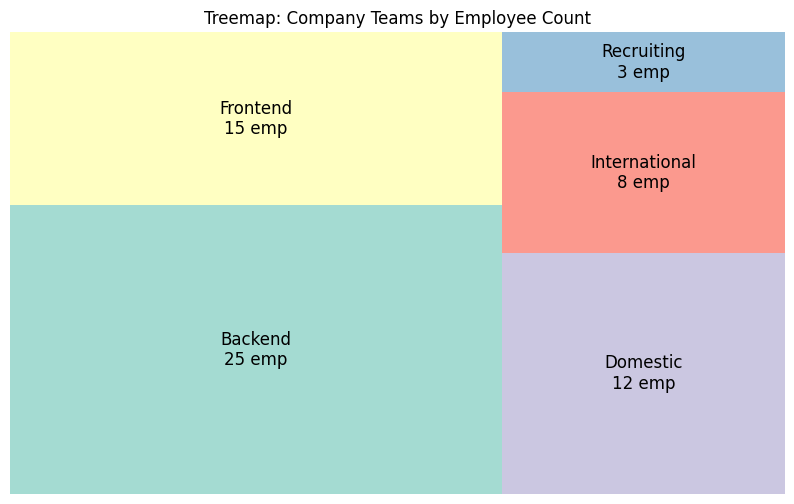

In [ ]:


# Data for treemap: label, size, parent
labels = [
    "Engineering", "Backend", "Frontend",
    "Sales", "Domestic", "International",
    "HR", "Recruiting"
]
sizes = [40, 25, 15, 20, 12, 8, 5, 3]
parents = ["Company", "Engineering", "Engineering", "Company", "Sales", "Sales", "Company", "HR"]

# For a simple treemap, flatten to leaf nodes and their sizes
leaf_labels = ["Backend", "Frontend", "Domestic", "International", "Recruiting"]
leaf_sizes = [25, 15, 12, 8, 3]
leaf_parents = ["Engineering", "Engineering", "Sales", "Sales", "HR"]

# Compose labels for display
display_labels = [f"{name}\n{size} emp" for name, size in zip(leaf_labels, leaf_sizes)]
colors = plt.cm.Set3(range(len(leaf_labels)))

plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=leaf_sizes,
    label=display_labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':12}
)
plt.title("Treemap: Company Teams by Employee Count")
plt.axis('off')
plt.show()